## Exploring Time Series Data

### Continuous AR models

In [2]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline

Generate an AR series

In [269]:
def make_ar1_series(size, dist, coef):
    series = np.zeros(size)
    series[0] = dist.rvs()
    for i in range(1, size):
        series[i] = coef * series[i-1] + dist.rvs()
    #series -= (np.arange(size)-size/2)**2/1000000
    return series

In [270]:
size = 10000
series = make_ar1_series(size, stats.norm(0,2), .5)

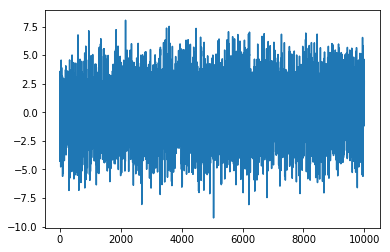

In [271]:
fig, ax = plt.subplots()
ax.plot(range(size), series)

In [272]:
model = ARIMA(series, order=(1, 0, 0))
fittedmodel = model.fit()

In [273]:
fittedmodel.params

array([-0.0063667 ,  0.49678441])

In [274]:
fittedmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                     ARMA(1, 0)   Log Likelihood              -21162.808
Method:                       css-mle   S.D. of innovations              2.008
Date:                Wed, 17 Jul 2019   AIC                          42331.616
Time:                        17:00:59   BIC                          42353.247
Sample:                             0   HQIC                         42338.938
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0064      0.040     -0.160      0.873      -0.085       0.072
ar.L1.y        0.4968      0.009     57.243      0.000       0.480       0.514
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0129           +0.0000j            2.0129            0.0000
-----------------------------------------------------------------------------
"""

Let's see how consistent the parameters are.

....................................................................................................

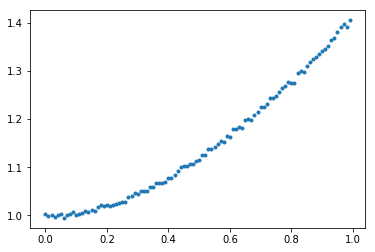

In [384]:
size = 100000
p0 = []
p1 = []
sigmas = []
coefs = np.arange(0, 1, 0.01)
for coef in coefs:
    print('.', end='')
    series = make_ar1_series(size, stats.norm(0,1), coef)
    series = series[::2]
    model = ARIMA(series, order=(1, 0, 0))
    fittedmodel = model.fit()
    p0.append(fittedmodel.params[0])
    p1.append(fittedmodel.params[1])
    sigmas.append(np.sqrt(fittedmodel.sigma2))
fig, ax = plt.subplots()
plt.plot(coefs, sigmas, '.')

The above is a plot of the standard deviation of the residuals as a function of the autocorrelation if we only look at ever other point. It looks as if the standard deviation is equal to the original sd times one plus the square of the autocorrelation.

In [389]:
sigmas = np.array(sigmas)

/Users/jackbennetto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


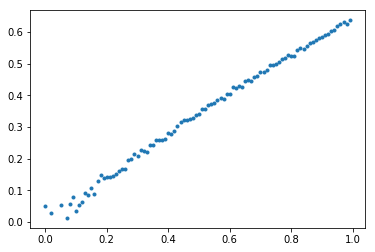

In [390]:
fig, ax = plt.subplots()
plt.plot(coefs, np.sqrt(sigmas-1), '.')

......................................

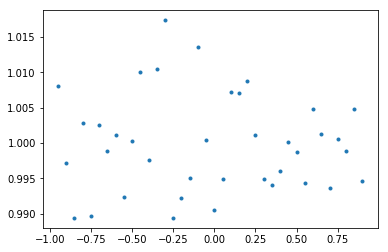

In [397]:
size = 10000
p0 = []
p1 = []
sigmas = []
coefs = np.arange(-.95, .95, 0.05)
for coef in coefs:
    print('.', end='')
    series = make_ar1_series(size, stats.norm(0,1), coef)
    #series = series[::3]
    model = ARIMA(series, order=(1, 0, 0))
    fittedmodel = model.fit()
    p0.append(fittedmodel.params[0])
    p1.append(fittedmodel.params[1])
    sigmas.append(np.sqrt(fittedmodel.sigma2))
fig, ax = plt.subplots()
plt.plot(coefs, sigmas, '.')

In [376]:
np.mean(p0), np.mean(p1), np.mean(sigmas)

(-0.02960646414624298, -0.0013680455029432142, 20.06331269263962)

In [377]:
np.sigmas

[19.714720132563347,
 20.039593542762145,
 20.178933066675818,
 20.117637067986085,
 19.956478500258427,
 20.207975556718022,
 20.294008826796052,
 20.237044138869837,
 19.794624613968413,
 20.092111479798028]

In [364]:
fittedmodel.sigma2 ** 0.5

2.2500569575696

2.2500581719844517

In [357]:
fittedmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                50000
Model:                     ARMA(1, 0)   Log Likelihood             -122743.362
Method:                       css-mle   S.D. of innovations              2.818
Date:                Wed, 17 Jul 2019   AIC                         245492.723
Time:                        17:27:13   BIC                         245519.183
Sample:                             0   HQIC                        245501.012
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4931      0.678     -0.727      0.467      -1.822       0.835
ar.L1.y        0.9814      0.001   1144.834      0.000       0.980       0.983
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0189           +0.0000j            1.0189            0.0000
-----------------------------------------------------------------------------
"""

### ADF Test

Let's look as the ADF test for a random walk.

In [55]:
size = 1000
for _ in range(10):
    series = make_ar1_series(size, stats.norm(0,1), 1)
    print(f"p-value: {sm.tsa.stattools.adfuller(series)[1]}")

p-value: 0.9360378366543591
p-value: 0.4921451257723607
p-value: 0.3432190977106833
p-value: 0.5780677395449645
p-value: 0.8380027461955815
p-value: 0.633731578797249
p-value: 0.86307192502037
p-value: 0.998773505466546
p-value: 0.4914539389860303
p-value: 0.13510762510971608


Let's try a change in the autocorrelation.

In [100]:
size = 100
for _ in range(10):
    s1 = make_ar1_series(size, stats.norm(0,1), 0)
    s2 = make_ar1_series(size, stats.norm(0,1), .9)
    series = np.concatenate([s1, s2])
    print(f"p-value: {sm.tsa.stattools.adfuller(series)[1]}")

p-value: 0.0001765231815661652
p-value: 0.19868010657039192
p-value: 0.004010858820399293
p-value: 0.00594857390412154
p-value: 0.005377639527935392
p-value: 0.02474350318275843
p-value: 0.004208728652623181
p-value: 0.0319834045899731
p-value: 0.23180785854209524
p-value: 0.027788747619996872


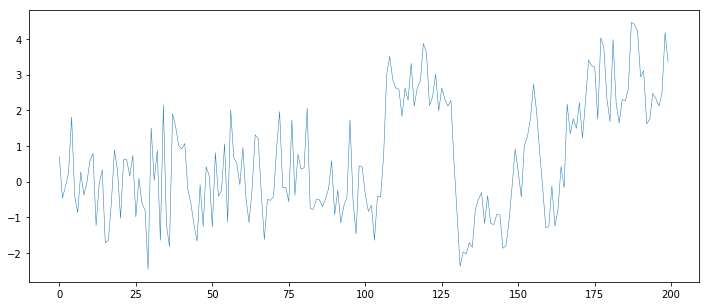

In [101]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(range(len(series)), series, lw=.5)

That still passes the test. How about white noise, but different variances (and means even!)

In [92]:
size = 100
for _ in range(10):
    s1 = make_ar1_series(size, stats.norm(1,1), 0)
    s2 = make_ar1_series(size, stats.norm(0,5), 0)
    series = np.concatenate([s1, s2])
    print(f"p-value: {sm.tsa.stattools.adfuller(series)[1]}")

p-value: 1.5100145191162023e-23
p-value: 0.027166916079656926
p-value: 1.961342790057371e-20
p-value: 0.127785570840664
p-value: 1.2146467307808052e-26
p-value: 1.089141806082865e-27
p-value: 3.8533124503216105e-09
p-value: 0.0011299239680126973
p-value: 9.551643781556744e-14
p-value: 3.277832475085141e-24


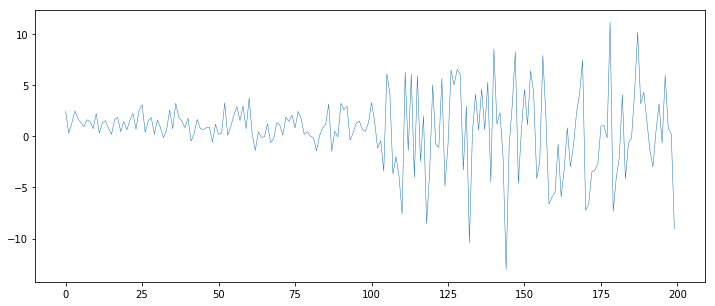

In [94]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(range(len(series)), series, lw=.5)

It still passes!

(though if the means are too different it will fail).

So the ADF test is **really** only about unit roots.

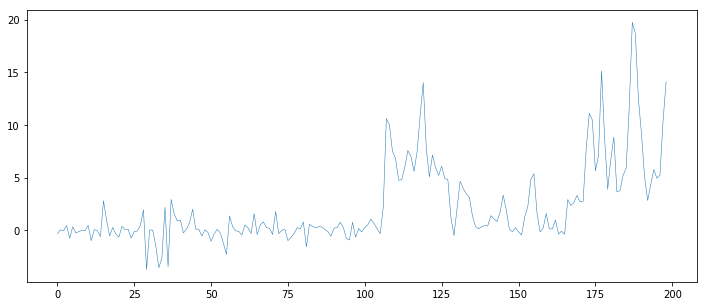

In [102]:
acseries = series[1:] * series[:-1]
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(range(len(acseries)), acseries, lw=.5)

## Testing for unit roots

Looking at Dickey-Fuller tests.

In [29]:
def random_walk(length, dist=stats.norm(0, 1)):
    white_noise = dist.rvs(length)
    return np.cumsum(white_noise)

In [30]:
def df_stat(series):
    return (series[:-1] - series[1:]).mean() - 1

In [31]:
h0 = []
for i in range(10000):
    h0.append(df_stat(random_walk(100, dist=stats.uniform(-1, 2))))

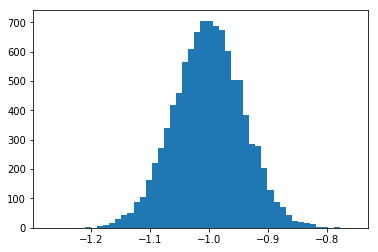

In [32]:
fig, ax = plt.subplots()
ax.hist(h0, bins=50);

That looks pretty normal.

In [33]:
stats.normaltest(h0)

NormaltestResult(statistic=1.9942660686123839, pvalue=0.3689356522457361)

I guess is is.